# Energy Produced by The All Energy Producing Plants

In [1]:
import numpy as np
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pandas import DataFrame

In [2]:
FILENAME = "Energy_production.csv"
datafile = pd.read_csv(FILENAME)
datafile.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Production
0,0,01-09-2017,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86
1,1,01-09-2017,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06
2,2,01-09-2017,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96
3,3,01-09-2017,Eastern,441.02,429.39,NaN,NaN,85.94,69.36,526.96
4,4,01-09-2017,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21,53.75


In [3]:
missing = pd.DataFrame(datafile.isnull().sum()/len(datafile.index))

missing.columns = ['Percentage of Missing Values']

missing

,Percentage of Missing Values
index,0.0
Date,0.0
Region,0.0
Thermal Generation Actual (in MU),0.0
Thermal Generation Estimated (in MU),0.0
Nuclear Generation Actual (in MU),0.4
Nuclear Generation Estimated (in MU),0.4
Hydro Generation Actual (in MU),0.0
Hydro Generation Estimated (in MU),0.0
Total Actual Production,0.0


In [4]:
datafile=datafile.fillna(0)

In [5]:
datafile.nunique()

index                                   4635
Date                                     989
Region                                     5
Thermal Generation Actual (in MU)       1388
Thermal Generation Estimated (in MU)    4543
Nuclear Generation Actual (in MU)         89
Nuclear Generation Estimated (in MU)    1692
Hydro Generation Actual (in MU)          172
Hydro Generation Estimated (in MU)      4117
Total Actual Production                 1418
dtype: int64

In [6]:
datafile['Date'].dtype

dtype('O')

In [7]:
datafile['date_parsed'] = pd.to_datetime(datafile['Date'], format="%d-%m-%Y")
datafile['date_parsed'].head()

0   2017-09-01
1   2017-09-01
2   2017-09-01
3   2017-09-01
4   2017-09-01
Name: date_parsed, dtype: datetime64[ns]

In [8]:
datafile =datafile.drop(['index'], axis=1)
Region_reviewed = datafile.groupby('Region').sum()
Region_reviewed

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Production
Region,,,,,,,
Eastern,482123.72,468831.45,0.00,0.00,48686.62,52461.95,530810.34
NorthEastern,32115.79,33105.95,0.00,0.00,17612.32,14058.66,49728.11
Northern,655048.26,602168.52,26964.08,31378.94,188854.16,201204.03,870866.50
Southern,610753.56,543828.71,55855.21,46483.24,71109.34,77083.80,737718.11
Western,1206631.65,1197394.22,27678.34,31880.85,36235.34,35180.02,1270545.33


<AxesSubplot:ylabel='Region'>

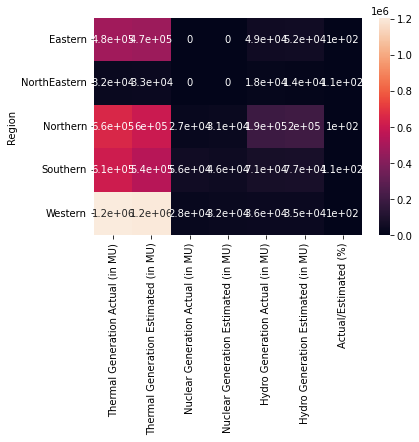

In [24]:
import seaborn as sns

Region_reviewed_t =Region_reviewed.drop(['Total Actual Production'], axis=1)
sns.heatmap(data=Region_reviewed_t, annot=True)

In [25]:
Region_reviewed['Actual/Estimated (%)']=(Region_reviewed['Total Actual Production']/(Region_reviewed['Thermal Generation Estimated (in MU)']
                                                                                     +Region_reviewed['Nuclear Generation Estimated (in MU)']
                                                                                     +Region_reviewed['Hydro Generation Estimated (in MU)']))*100
Region_reviewed.columns                                                    

Index(['Thermal Generation Actual (in MU)',
       'Thermal Generation Estimated (in MU)',
       'Nuclear Generation Actual (in MU)',
       'Nuclear Generation Estimated (in MU)',
       'Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)',
       'Total Actual Production', 'Actual/Estimated (%)'],
      dtype='object')

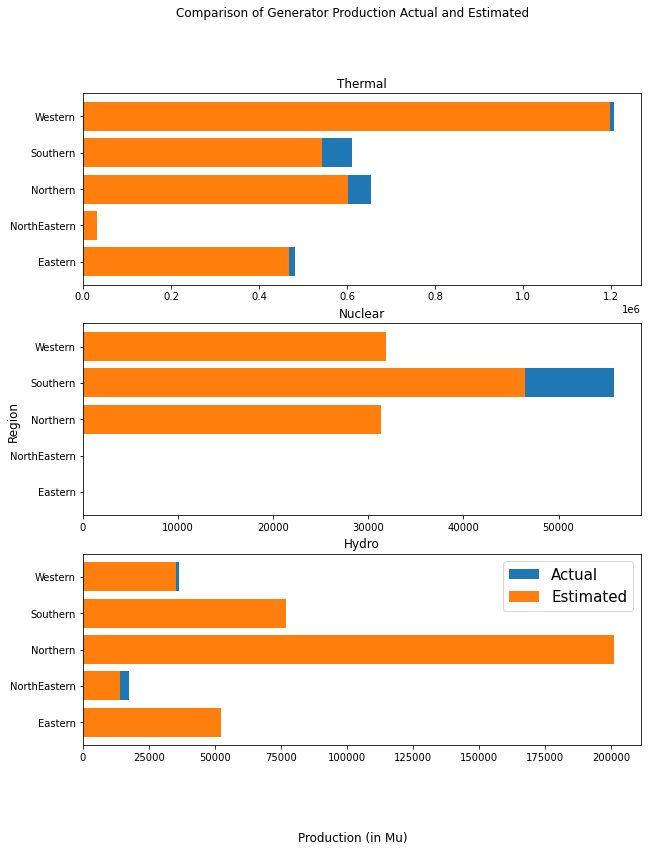

In [54]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharey=True)
fig.suptitle('Comparison of Generator Production Actual and Estimated')
ax[0].barh(Region_reviewed.index, Region_reviewed['Thermal Generation Actual (in MU)'], label='Actual')
ax[0].barh(Region_reviewed.index, Region_reviewed['Thermal Generation Estimated (in MU)'], label='Estimated')
ax[1].barh(Region_reviewed.index, Region_reviewed['Nuclear Generation Actual (in MU)'], label='Actual')
ax[1].barh(Region_reviewed.index, Region_reviewed['Nuclear Generation Estimated (in MU)'], label='Estimated')
ax[2].barh(Region_reviewed.index, Region_reviewed['Hydro Generation Actual (in MU)'], label='Actual')
ax[2].barh(Region_reviewed.index, Region_reviewed['Hydro Generation Estimated (in MU)'], label='Estimated')
#ax[0].xlabel('Generator Production', size=15)
ax[0].set_title('Thermal')
ax[1].set_title('Nuclear')
ax[2].set_title('Hydro')
fig.supxlabel('Production (in Mu)')
fig.supylabel('Region')
    
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='best', fontsize=15)

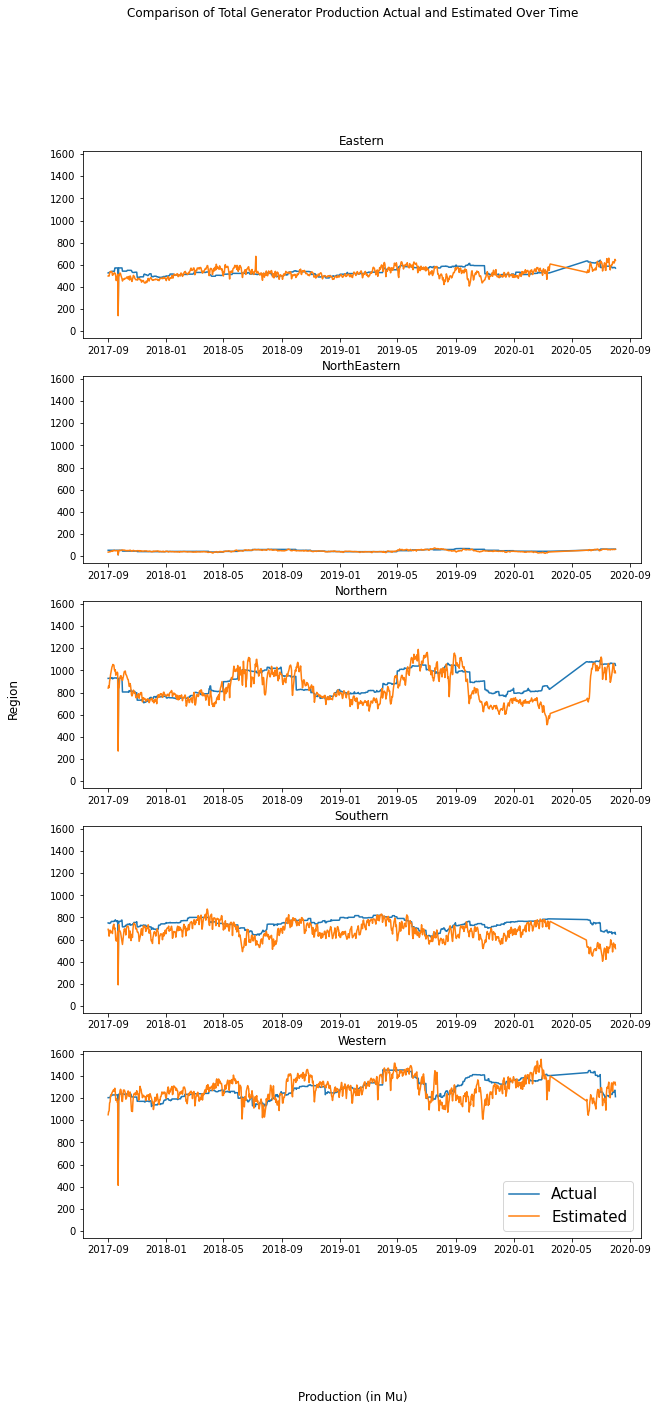

In [97]:
fig, ax = plt.subplots(5, 1, figsize=(10, 20), sharey=True)
fig.suptitle('Comparison of Total Generator Production Actual and Estimated Over Time')
datafile_Eastern=datafile[(datafile['Region'] == 'Eastern')].reset_index(drop=True)
ax[0].plot(datafile_Eastern['date_parsed'], datafile_Eastern['Total Actual Production'], label='Actual')
ax[0].plot(datafile_Eastern['date_parsed'], (datafile_Eastern['Thermal Generation Estimated (in MU)']+datafile_Eastern['Nuclear Generation Estimated (in MU)']+datafile_Eastern['Hydro Generation Estimated (in MU)']), label='Estimated')

datafile_NorthEastern=datafile[(datafile['Region'] == 'NorthEastern')].reset_index(drop=True)
ax[1].plot(datafile_NorthEastern['date_parsed'], datafile_NorthEastern['Total Actual Production'], label='Actual')
ax[1].plot(datafile_NorthEastern['date_parsed'], (datafile_NorthEastern['Thermal Generation Estimated (in MU)']+datafile_NorthEastern['Nuclear Generation Estimated (in MU)']+datafile_NorthEastern['Hydro Generation Estimated (in MU)']), label='Estimated')

datafile_Northern=datafile[(datafile['Region'] == 'Northern')].reset_index(drop=True)
ax[2].plot(datafile_Northern['date_parsed'], datafile_Northern['Total Actual Production'], label='Actual')
ax[2].plot(datafile_Northern['date_parsed'], (datafile_Northern['Thermal Generation Estimated (in MU)']+datafile_Northern['Nuclear Generation Estimated (in MU)']+datafile_Northern['Hydro Generation Estimated (in MU)']), label='Estimated')

datafile_Southern=datafile[(datafile['Region'] == 'Southern')].reset_index(drop=True)
ax[3].plot(datafile_Southern['date_parsed'], datafile_Southern['Total Actual Production'], label='Actual')
ax[3].plot(datafile_Southern['date_parsed'], (datafile_Southern['Thermal Generation Estimated (in MU)']+datafile_Southern['Nuclear Generation Estimated (in MU)']+datafile_Southern['Hydro Generation Estimated (in MU)']), label='Estimated')

datafile_Western=datafile[(datafile['Region'] == 'Western')].reset_index(drop=True)
ax[4].plot(datafile_Western['date_parsed'], datafile_Western['Total Actual Production'], label='Actual')
ax[4].plot(datafile_Western['date_parsed'], (datafile_Western['Thermal Generation Estimated (in MU)']+datafile_Western['Nuclear Generation Estimated (in MU)']+datafile_Western['Hydro Generation Estimated (in MU)']), label='Estimated')

ax[0].set_title('Eastern')
ax[1].set_title('NorthEastern')
ax[2].set_title('Northern')
ax[3].set_title('Southern')
ax[4].set_title('Western')
fig.supxlabel('Production (in Mu)')
fig.supylabel('Region')

    
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='best', fontsize=15)

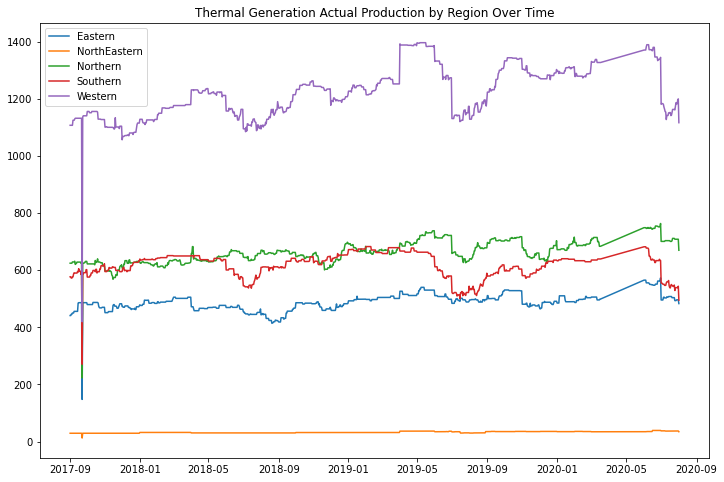

In [91]:
plt.figure(figsize=(12,8))
plt.plot(datafile_Eastern['date_parsed'], datafile_Eastern['Thermal Generation Actual (in MU)'], label='Eastern')
plt.plot(datafile_NorthEastern['date_parsed'], datafile_NorthEastern['Thermal Generation Actual (in MU)'], label='NorthEastern')
plt.plot(datafile_Northern['date_parsed'], datafile_Northern['Thermal Generation Actual (in MU)'], label='Northern')
plt.plot(datafile_Southern['date_parsed'], datafile_Southern['Thermal Generation Actual (in MU)'], label='Southern')
plt.plot(datafile_Western['date_parsed'], datafile_Western['Thermal Generation Actual (in MU)'], label='Western')
plt.title('Thermal Generation Actual Production by Region Over Time')
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='best', fontsize=10)

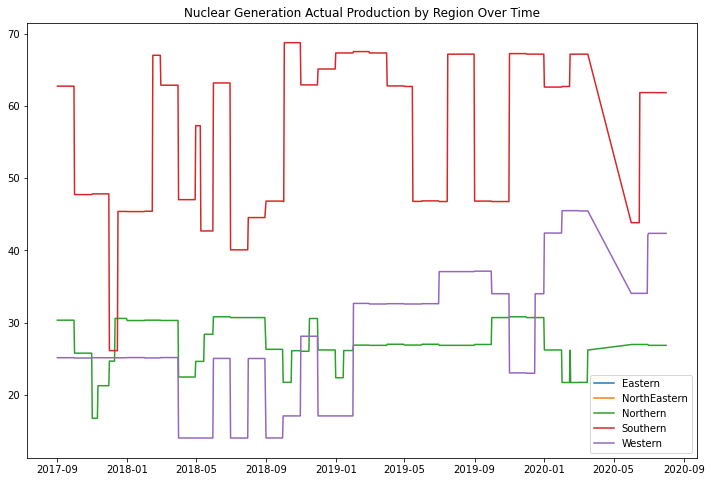

In [93]:
plt.figure(figsize=(12,8))
datafile_Eastern=datafile_Eastern[datafile_Eastern['Nuclear Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_NorthEastern=datafile_NorthEastern[datafile_NorthEastern['Nuclear Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_Northern=datafile_Northern[datafile_Northern['Nuclear Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_Southern=datafile_Southern[datafile_Southern['Nuclear Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_Western=datafile_Western[datafile_Western['Nuclear Generation Actual (in MU)'] != 0].reset_index(drop=True)

plt.plot(datafile_Eastern['date_parsed'], datafile_Eastern['Nuclear Generation Actual (in MU)'], label='Eastern')
plt.plot(datafile_NorthEastern['date_parsed'], datafile_NorthEastern['Nuclear Generation Actual (in MU)'], label='NorthEastern')
plt.plot(datafile_Northern['date_parsed'], datafile_Northern['Nuclear Generation Actual (in MU)'], label='Northern')
plt.plot(datafile_Southern['date_parsed'], datafile_Southern['Nuclear Generation Actual (in MU)'], label='Southern')
plt.plot(datafile_Western['date_parsed'], datafile_Western['Nuclear Generation Actual (in MU)'], label='Western')
plt.title('Nuclear Generation Actual Production by Region Over Time')
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='best', fontsize=10)

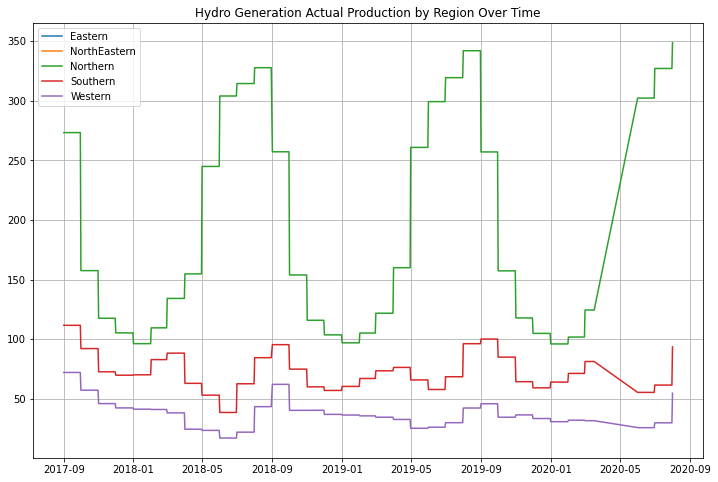

In [96]:
plt.figure(figsize=(12,8))
datafile_Eastern=datafile_Eastern[datafile_Eastern['Hydro Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_NorthEastern=datafile_NorthEastern[datafile_NorthEastern['Hydro Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_Northern=datafile_Northern[datafile_Northern['Hydro Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_Southern=datafile_Southern[datafile_Southern['Hydro Generation Actual (in MU)'] != 0].reset_index(drop=True)
datafile_Western=datafile_Western[datafile_Western['Hydro Generation Actual (in MU)'] != 0].reset_index(drop=True)

plt.plot(datafile_Eastern['date_parsed'], datafile_Eastern['Hydro Generation Actual (in MU)'], label='Eastern')
plt.plot(datafile_NorthEastern['date_parsed'], datafile_NorthEastern['Hydro Generation Actual (in MU)'], label='NorthEastern')
plt.plot(datafile_Northern['date_parsed'], datafile_Northern['Hydro Generation Actual (in MU)'], label='Northern')
plt.plot(datafile_Southern['date_parsed'], datafile_Southern['Hydro Generation Actual (in MU)'], label='Southern')
plt.plot(datafile_Western['date_parsed'], datafile_Western['Hydro Generation Actual (in MU)'], label='Western')
plt.title('Hydro Generation Actual Production by Region Over Time')
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='best', fontsize=10)
plt.grid()